# Import

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import math
from scipy.stats import binom

# Projet . Tests d'hypothèse
*Rémi de Guiran. D'après une idée de Florian Dadouchi*

Pour les 3 journées de cours consacrés à cette partie, nous allons nous intéresser à la détection de signal sonore. Cela nous amènera en première itération à réaliser une étude sur un bruit. Puis nous intéresserons à la détection d'un signal sonore présent au milieu du bruit. Pour réaliser une détection, nous allons devoir faire une hypothèse qui nous permettra de décider si oui ou non, un signal sonore est détecté. 

Vous aborderez les notions suivantes :
* Fonctions de distribution en statistique (continues et discrètes)
* Elements de probabilités
* Tests d'hypothèses (choix d'une hypothèse nule, d'une hypothèse alternative, critère de significativité et p-value)

Si cela remonte à loin, vous aurez besoin de vous raffraichir la mémoire sur certaines notions :
* Les bases du calcul différentiel et intégral (Qu'est ce qu'une dérivée ? Une intégrale ? etc). Vous n'aurez pas besoin de calculer des intégrales analytiquement mais il sera important de comprendre ces concepts pour avancer
* Les bases de probabilités.

**Sujet :** 
Depuis quelque temps, bien que vivant dans un endroit très calme la nuit, vous vous demandez si des sons ne vous dérangent pas pendant votre sommeil. Bien décidé à avoir le coeur net et plutôt que de vous demander à chaque reveil si celui-ci est dû à son quelconque ou juste à une mauvaise qualité de sommeil, vous décidez de réaliser un enregistrement sonore d'une nuit, et de créer un test qui permettra de détecter les sons qui se seront produits durant cette nuit.

Tous les enregistrements sont disponibles avec le sujet, chacun en double :
* un au format ".wav" (ça serait dommage de ne pas utiliser vos oreilles alors que vous travaillez sur des signaux sonores)
* l'autre et en format .txt.

Chaque enregistrement est **échantillonné à 48 kHz**.

Pour éviter de perdre du temps, la variable "signal sonore" contenue dans chaque fichier .txt est déjà normalisée, pour avoir des amplitudes de signaux n'excédant pas quelques unités. Vous n'aurez donc pas besoin de modifier vos données pour travailler dessus.


**Information importante :**

Toutes les lois de probabilités porteront sur la valeur absolue de l’amplitude mesurée. De manière générale, par défaut toute référence à une amplitude renvoie à la valeur absolue de l’amplitude mesurée. Le cas contraire vous sera explicité. L’abréviation **va** renvoie à la valeur absolue, et **vr** à la valeur réelle.


# Iteration 1 - Etude du bruit et d'un son

##  Etude du bruit

Avant de commencer à réfléchir à un quelconque test de detection de son, vous décidez d'étudier le bruit. Le bruit c'est en fait tout ce qui ne vous intéresse pas, un ensemble de sons qui s'additionnent pour donner une fluctuation très faiblement audible et qui ne vous dérange pas pendant votre sommeil (vous vivez dans un endroit calme). Ce qui vous intéresse in fine, ce sont les sons (on distingue donc bien les notions de son et de bruit). Mais pour espérer les détecter des **sons**, il vous faut d'abord caractériser **le bruit**.

-A.0 - Ecouter le bruit en ouvrant le fichier "bruit.wav"<br>
-A.1 - Importer le bruit "bruit_seul.txt" dans un array numpy

In [2]:
bruit=np.loadtxt('Data/bruit_seul.txt')

In [3]:
print('Longueur:',len(bruit))
print('Minimum :',min(bruit))
print('Maximum :',max(bruit))
print('Moyenne :',np.mean(bruit))
print('Médiane :',np.median(bruit))
print('Exart type :',np.std(bruit))

Longueur: 1000000
Minimum : -5.3159256969415605
Maximum : 5.086006591866338
Moyenne : 0.002100048943491257
Médiane : 0.0009873498852812778
Exart type : 0.9998988458819617


In [4]:
time=np.arange(0, len(bruit)/48000, 1/48000)

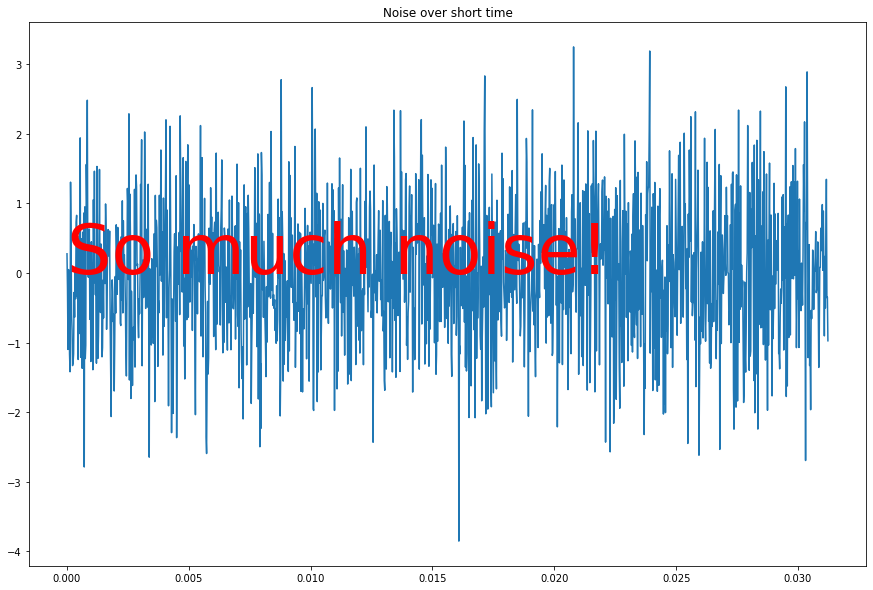

In [5]:
fig=plt.figure(figsize=(15,10))
plt.plot(time[0:1500],bruit[0:1500])
plt.title('Noise over short time')
plt.text(0,0,'So much noise!',fontsize=70,c='r')
plt.show()

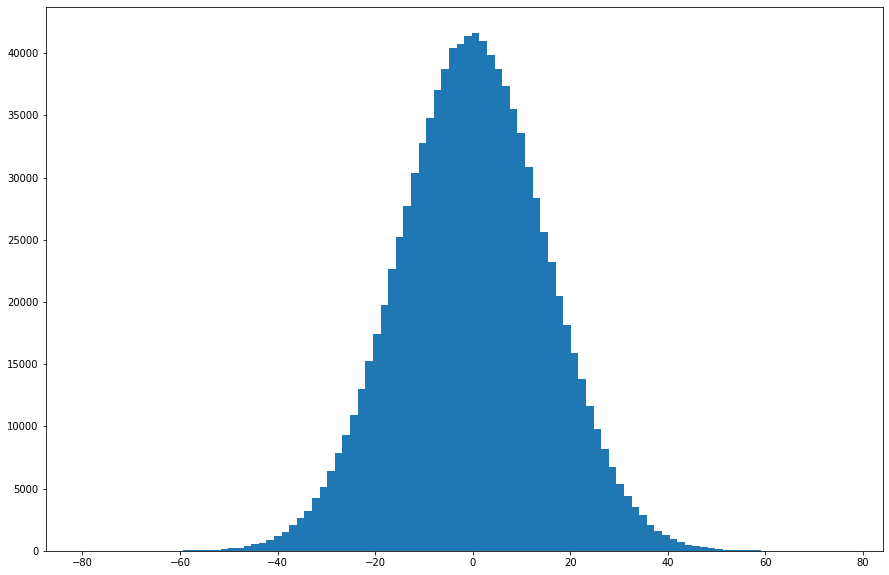

In [6]:
fig=plt.figure(figsize=(15,10))
plt.hist(bruit*150/10,bins=100)
plt.show()

### "Probability density function" et  "Cumulative distribution function" (fonction de répartition) de l'amplitude du bruit (va)

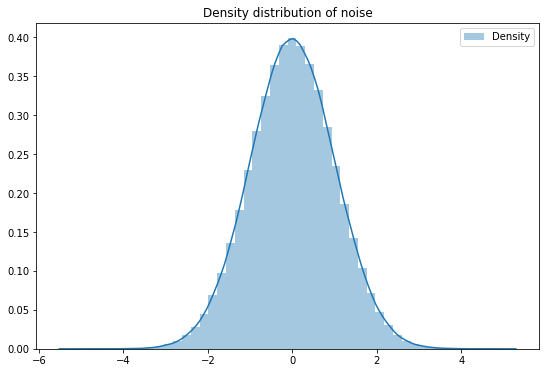

In [7]:
#Probability density function

plt.figure(figsize=(9,6))
sns.distplot(bruit, hist=True, kde=True, bins=50,label='Density')
plt.legend()
plt.title('Density distribution of noise')
plt.show()

In [8]:
# #Calcul manuel
# values_array=np.arange(-5,5,0.1)
# count_array=np.zeros(len(values_array))

# for i in range(0,len(values_array)):
#     print(values_array[i],end=' ')
#     for av in bruit:
#         if round(av,1)==round(values_array[i],1):
#             count_array[i]+=1

In [9]:
# # plt.plot(values_array,count_array/(len(bruit)*0.1))
# plt.plot(values_array,count_array/(len(bruit)*0.1))

In [10]:
# plt.plot(values_array,count_array_cs/len(bruit))

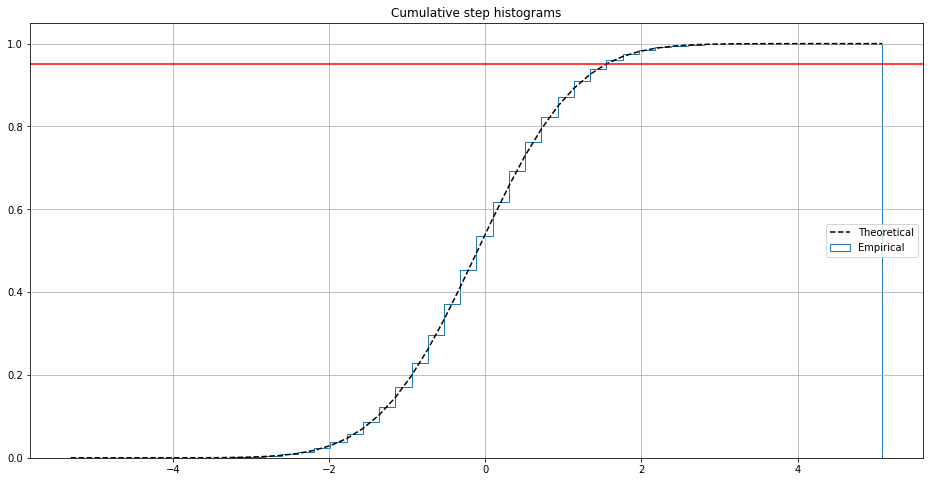

In [11]:
#Cumulative density distribution

mu = bruit.mean()
sigma = bruit.std()
n_bins = 50
fig, ax = plt.subplots(figsize=(16, 8))
# plot the cumulative histogram
n, bins, patches = ax.hist(bruit, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical')
# Add a line showing the expected distribution.
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
y = y.cumsum()
y /= y[-1]
ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')
# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
plt.axhline(y=0.95,c='r')

plt.show()

### Expressions analytiques

<b>Normal distribution (probability density):</b>
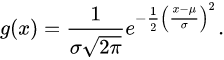<br>

<b>Cumulative density :</b>
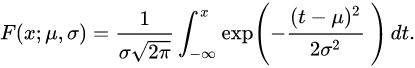

In [12]:
print('Longueur:',len(bruit))
print('Minimum :',min(bruit))
print('Maximum :',max(bruit))
print('Moyenne :',np.mean(bruit))
mean=np.mean(bruit)
print('Médiane :',np.median(bruit))
print('Exart type :',np.std(bruit))
std=np.std(bruit)

Longueur: 1000000
Minimum : -5.3159256969415605
Maximum : 5.086006591866338
Moyenne : 0.002100048943491257
Médiane : 0.0009873498852812778
Exart type : 0.9998988458819617


<b>Sur le même graphe, affichez la pdf de $ \mid bruit \mid $ et la gaussienne de moyenne et d'écart type calculé question précédente.</b>

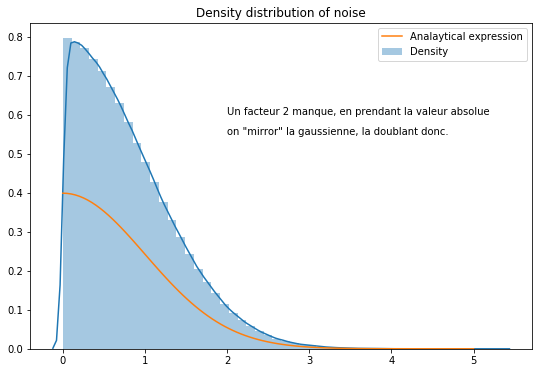

In [13]:
#Def gaussienne
def f(x):
    return (1/(std*np.sqrt(2*np.pi))*np.exp(-(x-mean)**2/(2*std**2)))

plt.figure(figsize=(9,6))
sns.distplot(abs(bruit), hist=True, kde=True, bins=50,label='Density')
plt.legend()
plt.title('Density distribution of noise')

x = np.linspace(0,5,100)
plt.plot(x,f(x),label="Analaytical expression")
plt.legend()
plt.text(2,0.6,'Un facteur 2 manque, en prendant la valeur absolue')
plt.text(2,0.55,'on "mirror" la gaussienne, la doublant donc.')
plt.show()



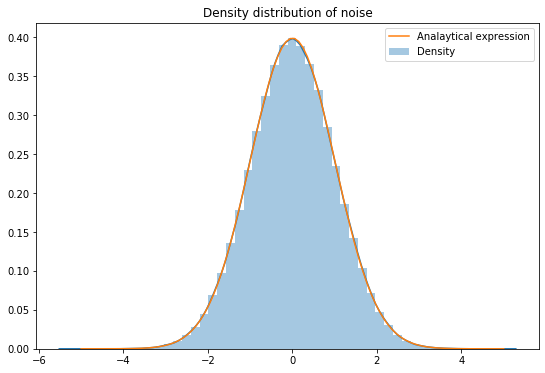

In [14]:
#Valeur non absolue
plt.figure(figsize=(9,6))
sns.distplot(bruit, hist=True, kde=True, bins=50,label='Density')
plt.legend()
plt.title('Density distribution of noise')

x = np.linspace(-5,5,100)
plt.plot(x,f(x),label="Analaytical expression")
plt.legend()
plt.show()

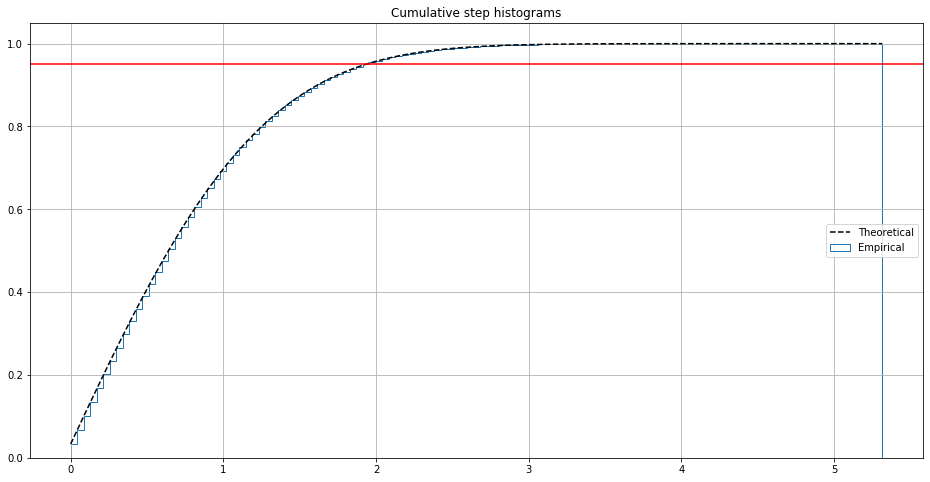

In [15]:
#Cumulative density function

mu = bruit.mean()
sigma = bruit.std()
n_bins = 125
fig, ax = plt.subplots(figsize=(16, 8))

# plot the cumulative histogram
n, bins, patches = ax.hist((abs(bruit)), n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical')

# Add a line showing the expected distribution.
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
y = y.cumsum()
y /= y[-1]
ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')

# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
plt.axhline(y=0.95,c='r')
plt.show()

### Probabilité de détection du bruit pour différentes plages d'amplitude 

Ici comme très souvent on différencie le bruit du son. Le bruit est une fluctuation statistique, alors que le son est porteur d'information.

On va considérer dans la suite de cette itération que le bruit est parfaitement caractérisé et que sa fonction de distribution est une demi-normale, de moyenne $\mu =0$ et d'écart type $\sigma = 1 $ :



For the normal distribution, the values less than one standard deviation away from the mean account for 68.27% of the set; while two standard deviations from the mean account for 95.45%; and three standard deviations account for 99.73%.

In [16]:
#cdf manuelle
def cdf_d(x):
    values_array = np.arange(-5, x ,0.05)
    foo=0
    foo = f(values_array).sum()
    return foo*0.1

def cdf(x):
    return f(x).cumsum()/(x.max()-x.min())

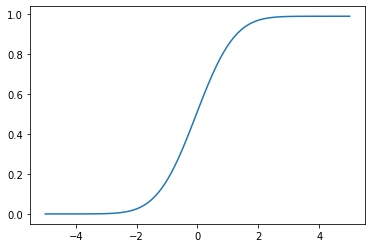

In [17]:
x=np.linspace(-5,5,100)
plt.plot(x,cdf(x))

In [18]:
print(cdf_d(1.7))
print(cdf_d(2.4))
print(cdf_d(3.25))
print(cdf_d(1.96))

1.905720140582534
1.9823737327470774
1.9987334350248869
1.951538696966052


In [19]:
#la fonction erf inverse permet d'obtenir l'inverse de la cdf.
import scipy
scipy.special.erfinv(0.95)*math.sqrt(2)

1.959963984540054

## Etude d'un son

Vous avez réalisé un enregistrement pendant la nuit. En inspectant rapidement la courbe amplitude(temps), il vous semble voir quelque chose de particulier, et vous soupçonnez fortement qu'il ne s'agisse pas du bruit mais d'un son (une tentative d'effraction ?). Vous trouverez l'extrait en question dans le fihier "son.wav".

<b>Identifier approximativement la zone de son et calculer la pdf et la cdf de l'amplitude du son (en va)</B>

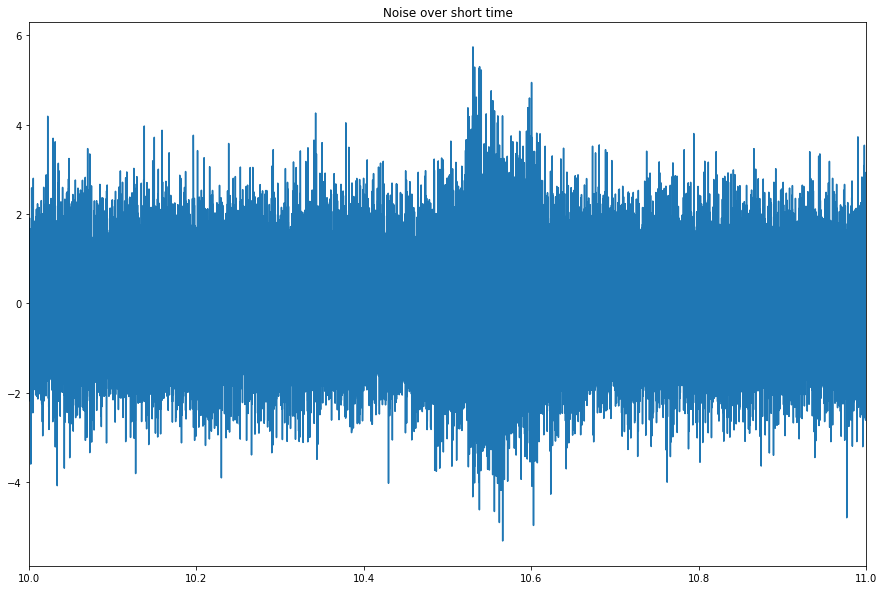

In [20]:
son=np.loadtxt('Data/son.txt')
ech=48000
time=np.arange(0, len(bruit)/ech, 1/ech)
fig=plt.figure(figsize=(15,10))
plt.plot(time,son)
plt.xlim(10, 11)
plt.title('Noise over short time')
plt.show()

In [21]:
print('Longueur:',len(son))
print('Minimum :',min(son))
print('Maximum :',max(son))
print('Moyenne :',np.mean(son))
mean=np.mean(son)
print('Médiane :',np.median(son))
print('Exart type :',np.std(son))
std=np.std(son)

Longueur: 1000000
Minimum : -5.3159256969415605
Maximum : 5.736036959101228
Moyenne : 0.000903158303491256
Médiane : -0.00012750001432003654
Exart type : 1.003335219500678


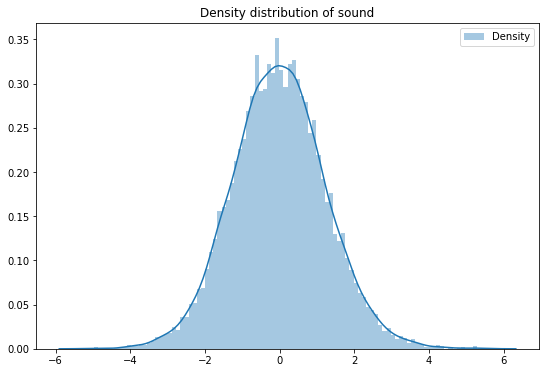

In [22]:
plt.figure(figsize=(9,6))
sound_of_interest=son[round(10.45*ech):round(10.7*ech)]
sns.distplot(sound_of_interest, hist=True, kde=True, bins=100,label='Density')

plt.legend()
plt.title('Density distribution of sound')

#x = np.linspace(round(10.45*ech),round(10.7*ech),100)
# plt.plot(x,f(x),label="Analaytical expression")
plt.legend()
plt.show()

<b>Pour quelque seuils d'amplitude (en valeur absolue), identifier les moments où l'amplitude enregistrée est supérieure à ce seuil. Quelles conclusions peut on tirer de ces tests de seuil.</b>

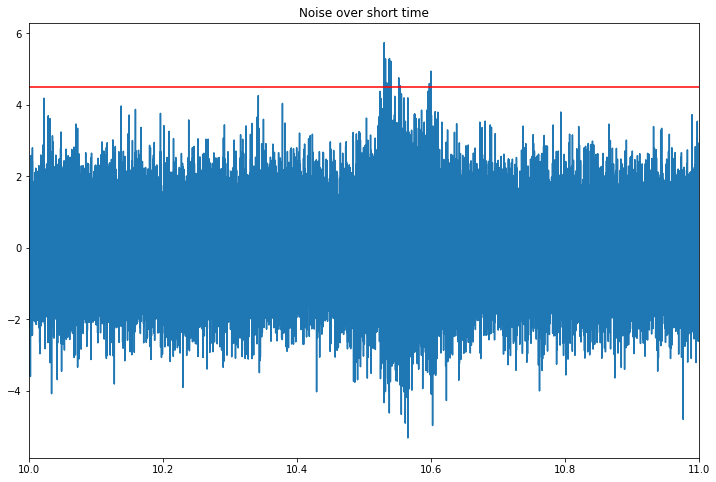

In [54]:
ech=48000
time=np.arange(0, len(son)/ech, 1/ech)
fig=plt.figure(figsize=(12,8))
plt.plot(time,son)
plt.axhline(y=4.5,c='r')
plt.title('Noise over short time')
plt.xlim(10, 11)
plt.show()

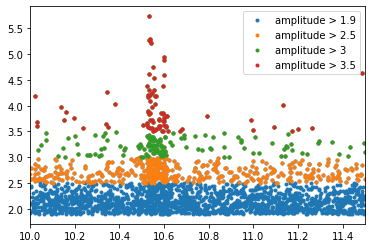

In [24]:
for i in [1.9, 2.5, 3, 3.5]:
    plt.plot(np.arange(len(son))[son > i] / 48000, son[son > i], '.', label='amplitude > {}'.format(i))
plt.xlim(10, 11.5)
plt.legend()
plt.show()

# Itération 2 - Test d'hypothèse

Plutôt que de faire des tests sur les occurences ponctuelles d'amplitude supérieure à une valeur seuil, vous décidez de faire une étude similaire portant sur le nombre d'occurences durant un certain temps. De cette manière, si le bruit atteint ponctuellement une amplitude importante, on peut se douter qu'il a très peu de chance de réitérer cet "exploit" beaucoup de fois dans un intervalle de temps court. Tout l'enjeux sera de quantifier cette "chance" (ie cette propbabilité).

## Un peu de proba

* On note une limite d'amplitude $a_l$. La probabilité d'obtenir sur une unique mesure (on peut dire tirage comme pour les jeux de hasard) une amplitude $A$, telle que $A >= a_l $ est notée $P_{>a_l} $.
* On note $N_{ech}$, le nombre d'amplitudes mesurées sur un intervalle (échantillon).
* On note $k$ un entier positif inférieur ou égal à $N_{ech}$. 



<b>Trouvez $P_k^{N_{ech}}$ la probabilité de tirer tirer $k$ fois une amplitude supérieure ou égale à $a_l$ lors de $N_{ech} $ tirages.</b>

Les plus affamés d'entre vous peuvent la démontrer. Sinon une recherche sur internet suffira largement.

$$P_k^{N_{ech}}=\binom{N_{ech}}{k}P_{>a_l}^{k}P_{<a_l}^{N_{ech}-k}$$
$$f{k}=\binom{n}{k}p^{k}(1-p)^{n-k}$$

The probability mass function above is defined in the “standardized” form. To shift distribution use the loc parameter. Specifically, binom.pmf(k, n, p, loc) is identically equivalent to binom.pmf(k - loc, n, p).

<b>Calculez plusieurs lois binomiales, chacune pour une valeur de $P_{>a_l}$ de votre choix</b>

Vérifiez bien que la somme des probabilités pour chaque loi vaut 1

Let's say we set the theshold (apmplitude) as 1.95-> probability is 5% to get a higher value.

Text(0, 0.35, 'Somme=1.0')

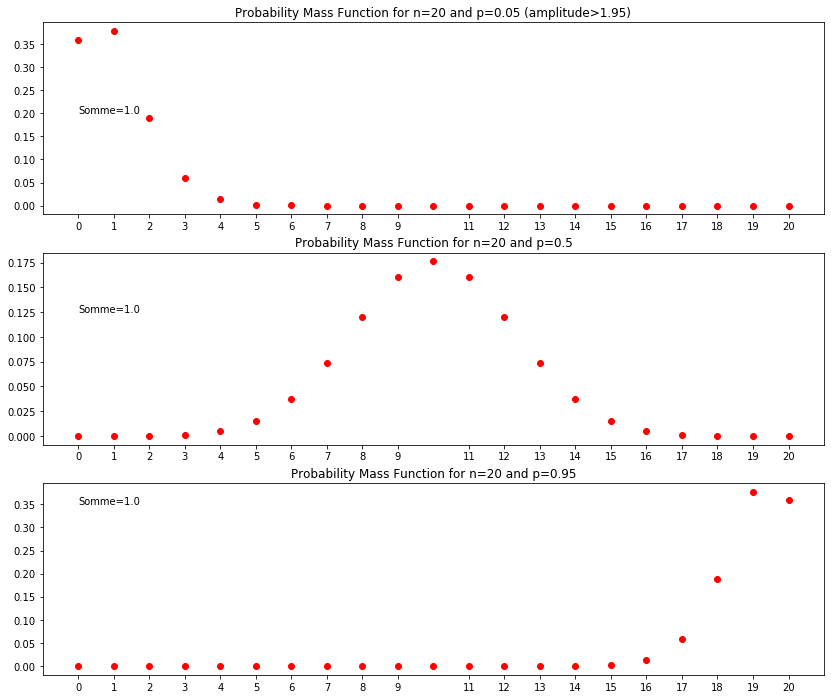

In [25]:
_=[]

n=20
x=np.round(np.linspace(0,n,n))
fig = plt.figure(figsize=(14,12))

ax=fig.add_subplot(311)
for k in range (0,n+1):
    _.append(binom.pmf(k,n,0.05))
ax.plot(_,'ro')
ax.xaxis.set_ticks(x)
ax.set_title('Probability Mass Function for n=20 and p=0.05 (amplitude>1.95)')
somme=np.sum(_)
ax.text(0,0.2,'Somme=%1.1f'%somme)

ax2=fig.add_subplot(312)
_=[]
for k in range (0,n+1):
    _.append(binom.pmf(k,n,0.5))
ax2.plot(_,'ro')
ax2.xaxis.set_ticks(x)
ax2.set_title('Probability Mass Function for n=20 and p=0.5')
somme=np.sum(_)
ax2.text(0,0.125,'Somme=%1.1f'%somme)


ax3=fig.add_subplot(313)
_=[]
for k in range (0,n+1):
    _.append(binom.pmf(k,n,0.95))
ax3.plot(_,'ro')
ax3.xaxis.set_ticks(x)
ax3.set_title('Probability Mass Function for n=20 and p=0.95')
somme=np.sum(_)
ax3.text(0,0.35,'Somme=%1.1f'%somme)

<b>Affichez en une sur un plot en barre</b>

Text(0, 0.35, 'Somme=1.0')

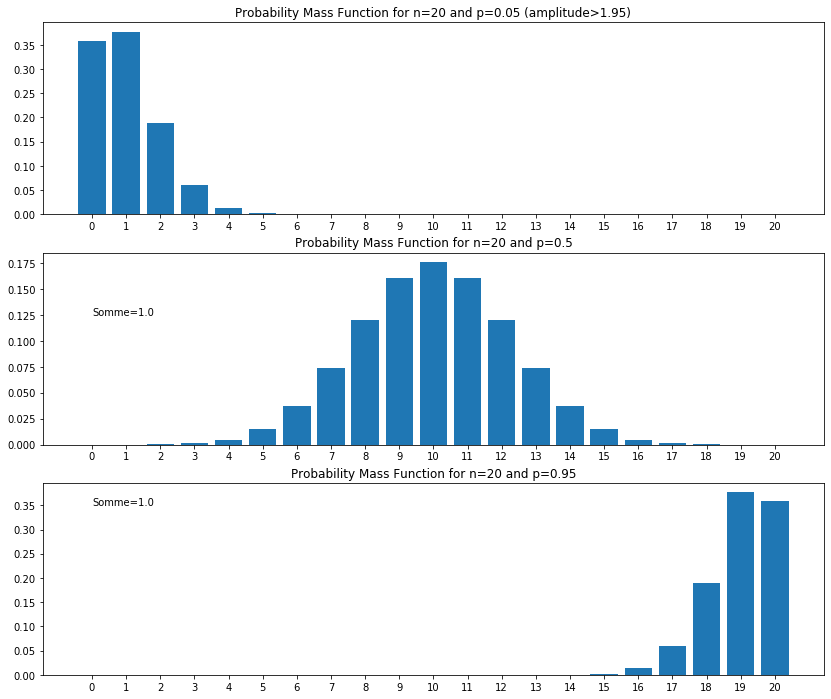

In [26]:
_=[]

n=20
x=np.arange(n+1)
fig = plt.figure(figsize=(14,12))

ax=fig.add_subplot(311)
for k in range (0,n+1):
    _.append(binom.pmf(k,n,0.05))
ax.bar(x,_)
ax.xaxis.set_ticks(x)
ax.set_title('Probability Mass Function for n=20 and p=0.05 (amplitude>1.95)')

ax2=fig.add_subplot(312)
_=[]
for k in range (0,n+1):
    _.append(binom.pmf(k,n,0.5))
ax2.bar(x,_)
ax2.xaxis.set_ticks(x)
ax2.set_title('Probability Mass Function for n=20 and p=0.5')
somme=np.sum(_)
ax2.text(0,0.125,'Somme=%1.1f'%somme)


ax3=fig.add_subplot(313)
_=[]
for k in range (0,n+1):
    _.append(binom.pmf(k,n,0.95))
ax3.bar(x,_)
ax3.xaxis.set_ticks(x)
ax3.set_title('Probability Mass Function for n=20 and p=0.95')
somme=np.sum(_)
ax3.text(0,0.35,'Somme=%1.1f'%somme)

# B - Construction du test d'hypothèse

Vous voulez donc construire votre test d'hypothèse. On s'appuiera pour ce test sur la loi binomiale étudiée partie A. Pour cela, vous avez besoin de définir une hypothèse nulle, une hypothèse alternative, ainsi qu'un critère de significativité.

* Il faudra identifier l'amplitude $a_l$ correspondant à une probabilité $P_{>a_l} $. Cette probabilité correspond à la probabilité, sur une seule mesure du bruit d'obtenir une amplitude supérieure ou égale à $a_l$. Donc vous devrez décider d'abord de la valeur de $P_{>a_l} $ pour en déduire $a_l$ (si vous êtes confus, revoyez la partie 4-b de l'itération 1).
* Vous aurez besoin de choisir un $N_{ech}$. Vous comptabiliserez pour un intervalle comprenant $N_{ech}$ mesures, le nombre $ N_a$ de fois que vous aurez obtenu une mesure $A > a_l$.

## B.1 - Caractérisez l'hypothèse nulle de votre test $H_{0} $



## B.2 - Caractérisez l'hypothèse alternative $H_1$ (ou $H_a$ selon les gouts)





$H_0$<br>
We have only noise.<br>
$H_1$ <br>
It is not noise, therefore it is sound.

## B.3 - Mesure/statistique

### a - Identifier l'élément mesurable (ie la statistique) qui permettra de réaliser le test

Pas de panique ! On en a déjà parlé, et si ça n'est pas encore clair pour vous, nous prendrons le temps pour que ça le devienne.


### b - Rappeler la loi de probabilité de cet élément mesurable (ie cette statistique "sous" $H_0$)


### c - Identifier la p-value d'un test



## B.4 - Seuil de significativité $\alpha_{sig} $

### B.4.a - Pour $\alpha_{sig}$, identifier dans quelles situations $H_0$ sera rejetée, ou bien  non rejetée.

* On note $N_a$ le nombre d'occurences de $A > a_l$ lors des $N_{ech}$ mesures du test. 


L'élement mesurable est le nombre de points dont l'amplitude au dessus du seuil fixé dans un échantillon n.<br>
La probabilité d'avoir une valeur au dessus du seuil $th$ est : 1-cdf(th)<br>
cdf est définie par :
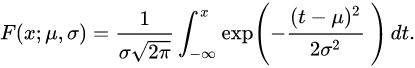
<!-- $$P(k)=\sum_{k}^{n}\binom{n}{k}p^{k}(1-p)^{n-k}$$ -->
En connaissant cette probabilité nous pouvons construire la PMF via cette équation :
$$P(k)=\binom{n}{k}p^{k}(1-p)^{n-k}$$
<!-- Nous souhaitons cette valeur supérieur à 5% pour rejeter l'hypothèse nulle. -->

Nous fixons le seuil à 1.96 (probabilité de 5%).
Nous pouvons alors tracer la PMF.

Text(0.5, 1.0, 'Probability Mass Function for n=50 and p=0.05 (amplitude>1.96)')

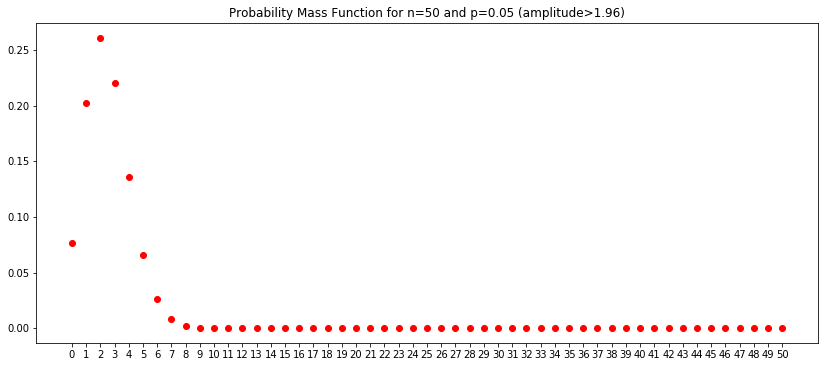

In [27]:
_=[]
th=1.96
n=50
x=np.arange(0,n+1,1)
fig = plt.figure(figsize=(14,20))

ax=fig.add_subplot(311)
for k in range (0,n+1):
    _.append(binom.pmf(k,n,0.05))
# _ = [x - 0.5 for x in _]
# _ = [x *2 for x in _]
ax.plot(_,'ro')
ax.xaxis.set_ticks(x)
ax.set_title('Probability Mass Function for n=50 and p=0.05 (amplitude>1.96)')

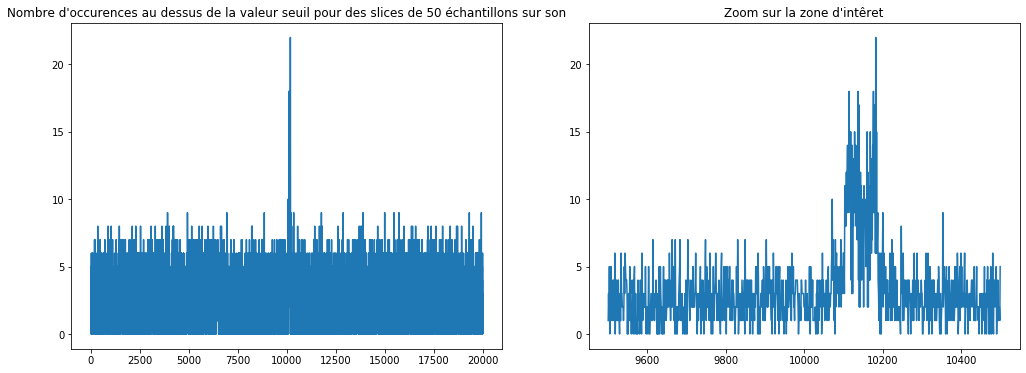

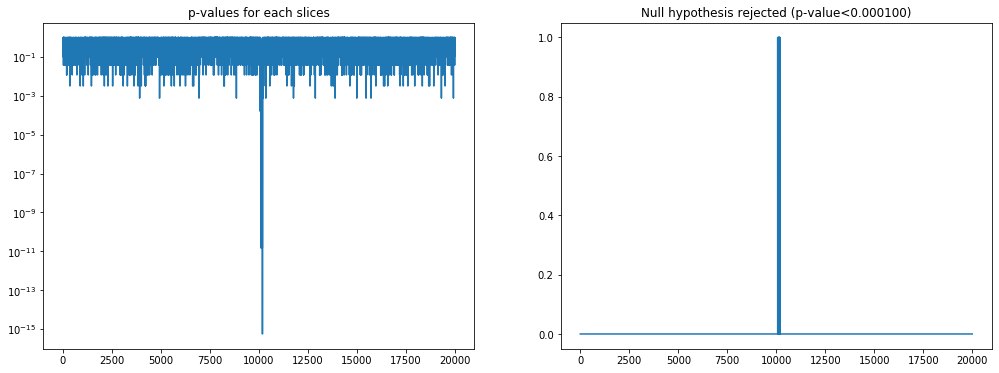

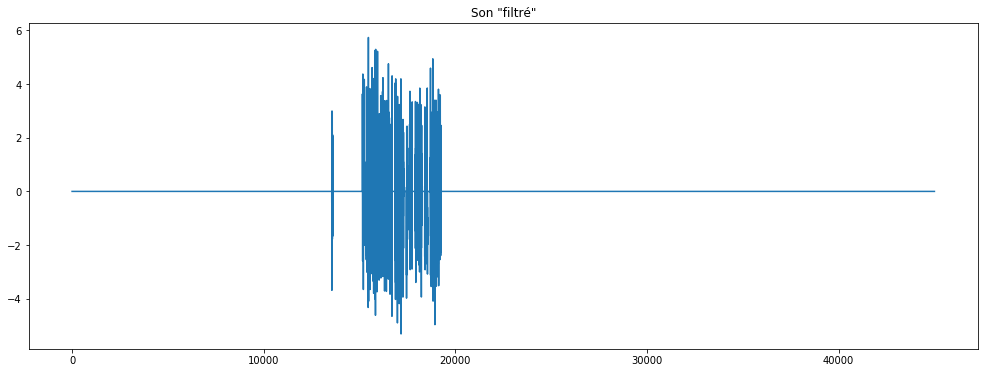

In [28]:
n=50
pas=n
number_values_above_th=[0]*(len(son)//n)
p_values_limit=10**-4
th=1.96 #2 sigma


i=0
while n<=len(son):
    for value in son[n-pas:n]:
        if abs(value)>th:
            number_values_above_th[i]+=1
    i+=1
    n+=pas


fig = plt.figure(figsize=(17,6))
ax1=fig.add_subplot(121)
ax1.set_title("Nombre d'occurences au dessus de la valeur seuil pour des slices de 50 échantillons sur son")
ax1.plot(number_values_above_th)

ax2=fig.add_subplot(122)

x=range(9500,10500,1)
ax2.set_title("Zoom sur la zone d'intêret")
ax2.plot(x,number_values_above_th[9500:10500])
# fig.show()

#Attention: cdf must start from one value below to take the value x in account
number_values_above_th_dec = [x-1 for x in number_values_above_th]
cdf=1 - binom.cdf(number_values_above_th, 50, 0.05)
mask=cdf<10**-4
fig = plt.figure(figsize=(17,6))
ax1=fig.add_subplot(122)
ax1.set_title('Null hypothesis rejected (p-value<%f)'%p_values_limit)
ax1.plot(mask.astype(int))
ax2=fig.add_subplot(121)
ax2.plot(1 - binom.cdf(number_values_above_th_dec, 50, 0.05))
ax2.set_title('p-values for each slices')
plt.semilogy()
# fig.show()

i=0
son_filtered=[]
for value in son:
    son_filtered.append(value*mask.astype(int)[i//50])
    i+=1
fig = plt.figure(figsize=(17,6))
plt.title('Son "filtré"')
plt.plot(son_filtered[490000:535000])

In [48]:
%%timeit
#Using numpy to count number of hits

# The test should be done on sample of 50 measures.
# So we must to decompose the signal into 50 measure
nbr_msr = 50
N_ech = np.array_split(abs(son), son.shape[0]//nbr_msr)
# calculate the number of value superior to the threshold
N_ech=np.array(N_ech)
result = (N_ech>2).sum(axis=1)

77.6 ms ± 128 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [52]:
%%timeit

n=50
pas=n
number_values_above_th=[0]*(len(son)//n)
p_values_limit=10**-4
th=1.96 #2 sigma


i=0
while n<=len(son):
    for value in son[n-pas:n]:
        if abs(value)>th:
            number_values_above_th[i]+=1
    i+=1
    n+=pas

541 ms ± 5.27 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Text(0.5, 1.0, 'pdf(k)')

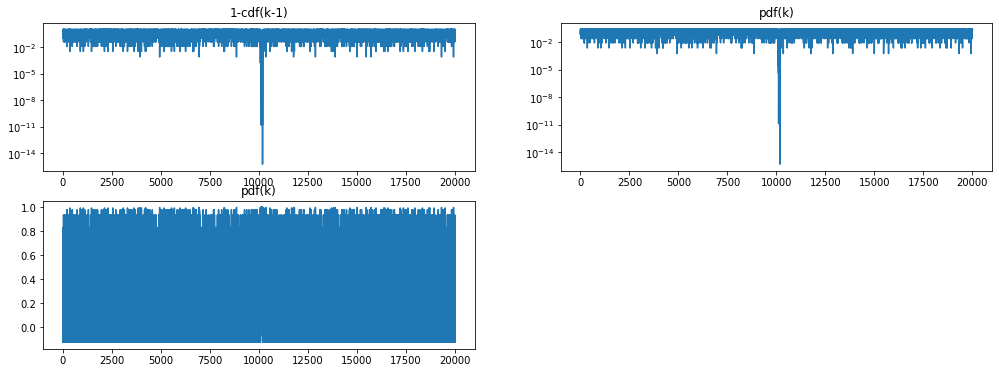

In [30]:
cdf=1 - binom.cdf(number_values_above_th_dec, 50, 0.05)
fig = plt.figure(figsize=(17,6))
ax1=fig.add_subplot(221)
ax1.set_title('1-cdf(k-1)')
ax1.semilogy()
ax1.plot(cdf)
ax2=fig.add_subplot(222)
ax2.plot(binom.pmf(number_values_above_th, 50, 0.05))
ax2.set_title('pdf(k)')
ax2.semilogy()

ax3=fig.add_subplot(223)
bu=binom.cdf(number_values_above_th_dec, 50, 0.05)-binom.pmf(number_values_above_th, 50, 0.05)
ax3.plot(bu)
ax3.set_title('pdf(k)')

In [31]:
# nbslice = 20000
# winwidth = 50
# dx = (len(son) - winwidth) // nbslice
# a, b = np.arange(nbslice) * dx, np.arange(nbslice) * dx + winwidth
# windows = np.array([slice(*w) for w in np.array(list(zip(a, b)))])
# number_values_above_th = np.array([(abs(son[w]) >= 3).sum() for w in windows])

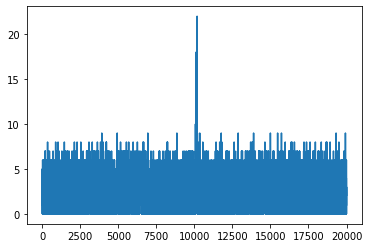

In [65]:
seuil=1.96
Nech3=np.split(abs(son),son.shape[0]//50)
Nech3= np.asarray(Nech3)
(Nech3>seuil).sum(axis=1)
plt.plot((Nech3>seuil).sum(axis=1))

In [62]:
len(Nech3)

50

<b>La vraissemblance des données n'est pas la crédence de la théorie.</b><br>
<b>Si $H_0$ est vraie, alors le seuil de la p-value est égale à la probabilité de rejeter $H_0$ vua la mèthode par p-value.</b><br>
<b>Si toutes le sétudes utilisaient une p-value de 1% et étaient sérieuses, alors 1% des études seraienr éronnées.</b><br>
p-value de 0.001% -> 0.001% de faux positifs dans le data set.<br>
https://www.youtube.com/watch?v=jy9b1HSqtSk

# 17 Statistical hypothesis 

## Normality tests

<b>Shapiro-Wilk test</b>

Tests whether a data sample has a Gaussian distribution.

Assumptions

    Observations in each sample are independent and identically distributed (iid).

Interpretation

    $H_0$ : the sample has a Gaussian distribution.
    $H_1$ : the sample does not have a Gaussian distribution.

The Shapiro–Wilk test tests the null hypothesis that a sample x1, ..., xn came from a normally distributed population.

In [32]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.895, p=0.193
Probably Gaussian


<b>D’Agostino’s K^2 Test</b>

Tests whether a data sample has a Gaussian distribution.

Assumptions

    Observations in each sample are independent and identically distributed (iid).

Interpretation

    H0: the sample has a Gaussian distribution.
    H1: the sample does not have a Gaussian distribution.

In statistics, D’Agostino’s K2 test, named for Ralph D'Agostino, is a goodness-of-fit measure of departure from normality, that is the test aims to establish whether or not the given sample comes from a normally distributed population. The test is based on transformations of the sample kurtosis and skewness, and has power only against the alternatives that the distribution is skewed and/or kurtic. 

In [33]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=3.392, p=0.183
Probably Gaussian


/home/campus-5/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<b>Anderson-Darling Test</b>

Tests whether a data sample has a Gaussian distribution.

Assumptions

    Observations in each sample are independent and identically distributed (iid).

Interpretation

    H0: the sample has a Gaussian distribution.
    H1: the sample does not have a Gaussian distribution.

The Anderson–Darling test is a statistical test of whether a given sample of data is drawn from a given probability distribution. In its basic form, the test assumes that there are no parameters to be estimated in the distribution being tested, in which case the test and its set of critical values is distribution-free. However, the test is most often used in contexts where a family of distributions is being tested, in which case the parameters of that family need to be estimated and account must be taken of this in adjusting either the test-statistic or its critical values. When applied to testing whether a normal distribution adequately describes a set of data, it is one of the most powerful statistical tools for detecting most departures from normality.[1][2] K-sample Anderson–Darling tests are available for testing whether several collections of observations can be modelled as coming from a single population, where the distribution function does not have to be specified.

In [34]:
# Example of the Anderson-Darling Normality Test
from scipy.stats import anderson
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=0.424
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


## Correlation tests

<b>Pearson’s Correlation Coefficient</b>

Tests whether two samples have a linear relationship.

Assumptions

    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample are normally distributed.
    Observations in each sample have the same variance.

Interpretation

    H0: the two samples are independent.
    H1: there is a dependency between the samples.

In statistics, the Pearson correlation coefficient (PCC, pronounced /ˈpɪərsən/), also referred to as Pearson's r, the Pearson product-moment correlation coefficient (PPMCC) or the bivariate correlation,[1] is a measure of the linear correlation between two variables X and Y. According to the Cauchy–Schwarz inequality it has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation. It is widely used in the sciences. It was developed by Karl Pearson from a related idea introduced by Francis Galton in the 1880s and for which the mathematical formula was derived and published by Auguste Bravais in 1844.[2][3][4][5][6] The naming of the coefficient is thus an example of Stigler's Law. 

stat=0.688, p=0.028
Probably dependent


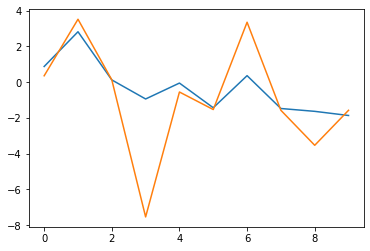

In [35]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')
plt.plot(data1)
plt.plot(data2)

<b>Spearman’s Rank Correlation</b>

Tests whether two samples have a monotonic relationship.

Assumptions

    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample can be ranked.

Interpretation

    H0: the two samples are independent.
    H1: there is a dependency between the samples.

In statistics, Spearman's rank correlation coefficient or Spearman's ρ, named after Charles Spearman and often denoted by the Greek letter ρ {\displaystyle \rho } \rho (rho) or as r s {\displaystyle r_{s}} r_{s}, is a nonparametric measure of rank correlation (statistical dependence between the rankings of two variables). It assesses how well the relationship between two variables can be described using a monotonic function. 

In [36]:
# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.855, p=0.002
Probably dependent


<b>Kendall’s Rank Correlation</b>

Tests whether two samples have a monotonic relationship.

Assumptions

    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample can be ranked.

Interpretation

    H0: the two samples are independent.
    H1: there is a dependency between the samples.

In statistics, the Kendall rank correlation coefficient, commonly referred to as Kendall's τ coefficient (after the Greek letter τ, tau), is a statistic used to measure the ordinal association between two measured quantities. A τ test is a non-parametric hypothesis test for statistical dependence based on the τ coefficient.

It is a measure of rank correlation: the similarity of the orderings of the data when ranked by each of the quantities. It is named after Maurice Kendall, who developed it in 1938,[1] though Gustav Fechner had proposed a similar measure in the context of time series in 1897.[2]

Intuitively, the Kendall correlation between two variables will be high when observations have a similar (or identical for a correlation of 1) rank (i.e. relative position label of the observations within the variable: 1st, 2nd, 3rd, etc.) between the two variables, and low when observations have a dissimilar (or fully different for a correlation of −1) rank between the two variables. 

In [37]:
# Example of the Kendall's Rank Correlation Test
from scipy.stats import kendalltau
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.733, p=0.002
Probably dependent


<b>Chi-Squared Test</b>

Tests whether two categorical variables are related or independent.

Assumptions

    Observations used in the calculation of the contingency table are independent.
    25 or more examples in each cell of the contingency table.

Interpretation

    H0: the two samples are independent.
    H1: there is a dependency between the samples.
   
The term "chi-squared test," also written as χ2 test, refers to certain types of statistical hypothesis tests that are valid to perform when the test statistic is chi-squared distributed under the null hypothesis. Often, however, the term is used to refer to Pearson's chi-squared test and variants thereof. Pearson's chi-squared test is used to determine whether there is a statistically significant difference (i.e., a magnitude of difference that is unlikely to be due to chance alone) between the expected frequencies and the observed frequencies in one or more categories of a so-called contingency table. 


In [38]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
table = [[10, 20, 30],[6,  9,  17]]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.272, p=0.873
Probably independent


##  Stationary Tests

A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. Most statistical forecasting methods are based on the assumption that the time series can be rendered approximately stationary (i.e., "stationarized") through the use of mathematical transformations.

<b>Augmented Dickey-Fuller Unit Root Test</b>

Tests whether a time series has a unit root, e.g. has a trend or more generally is autoregressive.

Assumptions

    Observations in are temporally ordered.

Interpretation

    H0: a unit root is present (series is non-stationary).
    H1: a unit root is not present (series is stationary).

In statistics and econometrics, an augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity. It is an augmented version of the Dickey–Fuller test for a larger and more complicated set of time series models.

The augmented Dickey–Fuller (ADF) statistic, used in the test, is a negative number. The more negative it is, the stronger the rejection of the hypothesis that there is a unit root at some level of confidence.[1] 

In [39]:
# Example of the Augmented Dickey-Fuller unit root test
from statsmodels.tsa.stattools import adfuller
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, obs, crit, t = adfuller(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably not Stationary')
else:
	print('Probably Stationary')

stat=1.496, p=0.998
Probably not Stationary


<b>Kwiatkowski-Phillips-Schmidt-Shin</b>

Tests whether a time series is trend stationary or not.

Assumptions

    Observations in are temporally ordered.

Interpretation

    H0: the time series is not trend-stationary.
    H1: the time series is trend-stationary.

In econometrics, Kwiatkowski–Phillips–Schmidt–Shin (KPSS) tests are used for testing a null hypothesis that an observable time series is stationary around a deterministic trend (i.e. trend-stationary) against the alternative of a unit root.[1]

Contrary to most unit root tests, the presence of a unit root is not the null hypothesis but the alternative. Additionally, in the KPSS test, the absence of a unit root is not a proof of stationarity but, by design, of trend-stationarity. This is an important distinction since it is possible for a time series to be non-stationary, have no unit root yet be trend-stationary. In both unit root and trend-stationary processes, the mean can be growing or decreasing over time; however, in the presence of a shock, trend-stationary processes are mean-reverting (i.e. transitory, the time series will converge again towards the growing mean, which was not affected by the shock) while unit-root processes have a permanent impact on the mean (i.e. no convergence over time).[2] 

In [40]:
# Example of the Kwiatkowski-Phillips-Schmidt-Shin test
from statsmodels.tsa.stattools import kpss
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, crit = kpss(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably not Stationary')
else:
	print('Probably Stationary')

stat=0.410, p=0.073
Probably not Stationary


/home/campus-5/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


## Parametric Statistical Hypothesis Tests

<b>Student's t-test</b>

Tests whether the means of two independent samples are significantly different.

Assumptions

    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample are normally distributed.
    Observations in each sample have the same variance.

Interpretation

    H0: the means of the samples are equal.
    H1: the means of the samples are unequal.

The t-test is any statistical hypothesis test in which the test statistic follows a Student's t-distribution under the null hypothesis.

A t-test is most commonly applied when the test statistic would follow a normal distribution if the value of a scaling term in the test statistic were known. When the scaling term is unknown and is replaced by an estimate based on the data, the test statistics (under certain conditions) follow a Student's t distribution. The t-test can be used, for example, to determine if the means of two sets of data are significantly different from each other. 

stat=-0.326, p=0.748
Probably the same distribution


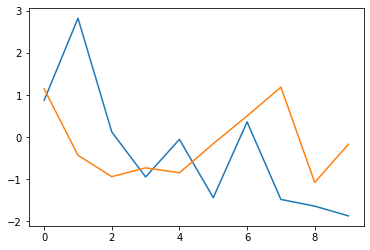

In [41]:
# Example of the Student's t-test
from scipy.stats import ttest_ind
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')
plt.plot(data1)
plt.plot(data2)

<b>Paired Student’s t-test</b>

Tests whether the means of two paired samples are significantly different.

Assumptions

    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample are normally distributed.
    Observations in each sample have the same variance.
    Observations across each sample are paired.

Interpretation

    H0: the means of the samples are equal.
    H1: the means of the samples are unequal.

In [42]:
from scipy.stats import ttest_rel
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-0.334, p=0.746
Probably the same distribution


<b>Analysis of Variance Test (ANOVA)</b>

Tests whether the means of two or more independent samples are significantly different.

Assumptions

    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample are normally distributed.
    Observations in each sample have the same variance.

Interpretation

    H0: the means of the samples are equal.
    H1: one or more of the means of the samples are unequal.

Analysis of variance (ANOVA) is a collection of statistical models and their associated estimation procedures (such as the "variation" among and between groups) used to analyze the differences among group means in a sample. ANOVA was developed by statistician and evolutionary biologist Ronald Fisher. The ANOVA is based on the law of total variance, where the observed variance in a particular variable is partitioned into components attributable to different sources of variation. In its simplest form, ANOVA provides a statistical test of whether two or more population means are equal, and therefore generalizes the t-test beyond two means. 

stat=0.096, p=0.908
Probably the same distribution


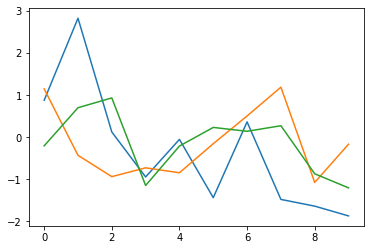

In [43]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')
plt.plot(data1)
plt.plot(data2)
plt.plot(data3)

<b>Repeated Measures ANOVA Test</b>

Tests whether the means of two or more paired samples are significantly different.

Assumptions

    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample are normally distributed.
    Observations in each sample have the same variance.
    Observations across each sample are paired.

Interpretation

    H0: the means of the samples are equal.
    H1: one or more of the means of the samples are unequal.


Currently not supported in Python.

## Nonparametric Statistical Hypothesis Tests

<b>The nonparametric test is one where the researcher has no idea regarding the population parameter.</b>

Key Differences Between Parametric and Nonparametric Tests

The fundamental differences between parametric and nonparametric test are discussed in the following points:

   <ul><li> A statistical test, in which specific assumptions are made about the population parameter is known as the parametric test. A statistical test used in the case of non-metric independent variables is called nonparametric test.</li>
   <li> In the parametric test, the test statistic is based on distribution. On the other hand, the test statistic is arbitrary in the case of the nonparametric test.</li>
   <li> In the parametric test, it is assumed that the measurement of variables of interest is done on interval or ratio level. As opposed to the nonparametric test, wherein the variable of interest are measured on nominal or ordinal scale.</li>
    <li>In general, the measure of central tendency in the parametric test is mean, while in the case of the nonparametric test is median.</li>
    <li>In the parametric test, there is complete information about the population. Conversely, in the nonparametric test, there is no information about the population.</li>
   <li> The applicability of parametric test is for variables only, whereas nonparametric test applies to both variables and attributes.</li>
   <li> For measuring the degree of association between two quantitative variables, Pearson’s coefficient of correlation is used in the parametric test, while spearman’s rank correlation is used in the nonparametric test.</li></ul>

<b>Mann-Whitney U Test</b>
<p>Tests whether the distributions of two independent samples are equal or not.</p>
<p>Assumptions</p>
<ul>
<li>Observations in each sample are independent and identically distributed (iid).</li>
<li>Observations in each sample can be ranked.</li>
</ul>
<p>Interpretation</p>
<ul>
<li>H0: the distributions of both samples are equal.</li>
<li>H1: the distributions of both samples are not equal.</li>
    
In statistics, the Mann–Whitney U test (also called the Mann–Whitney–Wilcoxon (MWW), Wilcoxon rank-sum test, or Wilcoxon–Mann–Whitney test) is a nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one population will be less than or greater than a randomly selected value from a second population.

This test can be used to investigate whether two independent samples were selected from populations having the same distribution. A similar nonparametric test used on dependent samples is the Wilcoxon signed-rank test. 

stat=40.000, p=0.236
Probably the same distribution


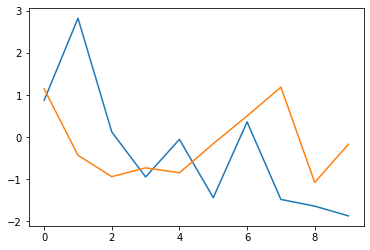

In [44]:
# Example of the Mann-Whitney U Test
from scipy.stats import mannwhitneyu
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')
plt.plot(data1)
plt.plot(data2)

<b>Wilcoxon Signed-Rank Test</b>
<p>Tests whether the distributions of two paired samples are equal or not.</p>
<p>Assumptions</p>
<ul>
<li>Observations in each sample are independent and identically distributed (iid).</li>
<li>Observations in each sample can be ranked.</li>
<li>Observations across each sample are paired.</li>
</ul>
<p>Interpretation</p>
<ul>
<li>H0: the distributions of both samples are equal.</li>
<li>H1: the distributions of both samples are not equal.</li>
    
    The Wilcoxon signed-rank test is a non-parametric statistical hypothesis test used to compare two related samples, matched samples, or repeated measurements on a single sample to assess whether their population mean ranks differ (i.e. it is a paired difference test). It can be used as an alternative to the paired Student's t-test (also known as "t-test for matched pairs" or "t-test for dependent samples") when the distribution of the differences between the two samples cannot be assumed to be normally distributed[1]. A Wilcoxon signed-rank test is a nonparametric test that can be used to determine whether two dependent samples were selected from populations having the same distribution. 

In [45]:
# Example of the Wilcoxon Signed-Rank Test
from scipy.stats import wilcoxon
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = wilcoxon(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=21.000, p=0.508
Probably the same distribution


<b>Kruskal-Wallis H Test</b>
<p>Tests whether the distributions of two or more independent samples are equal or not.</p>
<p>Assumptions</p>
<ul>
<li>Observations in each sample are independent and identically distributed (iid).</li>
<li>Observations in each sample can be ranked.</li>
</ul>
<p>Interpretation</p>
<ul>
<li>H0: the distributions of all samples are equal.</li>
<li>H1: the distributions of one or more samples are not equal.</li>
    
    he Kruskal–Wallis test by ranks, Kruskal–Wallis H test[1] (named after William Kruskal and W. Allen Wallis), or one-way ANOVA on ranks[1] is a non-parametric method for testing whether samples originate from the same distribution.[2][3][4] It is used for comparing two or more independent samples of equal or different sample sizes. It extends the Mann–Whitney U test, which is used for comparing only two groups. The parametric equivalent of the Kruskal–Wallis test is the one-way analysis of variance (ANOVA).

A significant Kruskal–Wallis test indicates that at least one sample stochastically dominates one other sample. The test does not identify where this stochastic dominance occurs or for how many pairs of groups stochastic dominance obtains. For analyzing the specific sample pairs for stochastic dominance, Dunn's test,[5] pairwise Mann-Whitney tests without Bonferroni correction,[6] or the more powerful but less well known Conover–Iman test[6] are sometimes used.

Since it is a non-parametric method, the Kruskal–Wallis test does not assume a normal distribution of the residuals, unlike the analogous one-way analysis of variance. If the researcher can make the assumptions of an identically shaped and scaled distribution for all groups, except for any difference in medians, then the null hypothesis is that the medians of all groups are equal, and the alternative hypothesis is that at least one population median of one group is different from the population median of at least one other group. 

In [46]:
# Example of the Kruskal-Wallis H Test
from scipy.stats import kruskal
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = kruskal(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.571, p=0.450
Probably the same distribution


<b>Friedman Test</b>
<p>Tests whether the distributions of two or more paired samples are equal or not.</p>
<p>Assumptions</p>
<ul>
<li>Observations in each sample are independent and identically distributed (iid).</li>
<li>Observations in each sample can be ranked.</li>
<li>Observations across each sample are paired.</li>
</ul>
<p>Interpretation</p>
<ul>
<li>H0: the distributions of all samples are equal.</li>
<li>H1: the distributions of one or more samples are not equal.</li>
    
    The Friedman test is a non-parametric statistical test developed by Milton Friedman.[1][2][3] Similar to the parametric repeated measures ANOVA, it is used to detect differences in treatments across multiple test attempts. The procedure involves ranking each row (or block) together, then considering the values of ranks by columns. Applicable to complete block designs, it is thus a special case of the Durbin test.

Classic examples of use are:

    n wine judges each rate k different wines. Are any of the k wines ranked consistently higher or lower than the others?
    n welders each use k welding torches, and the ensuing welds were rated on quality. Do any of the k torches produce consistently better or worse welds?

The Friedman test is used for one-way repeated measures analysis of variance by ranks. In its use of ranks it is similar to the Kruskal–Wallis one-way analysis of variance by ranks.

Friedman test is widely supported by many statistical software packages. 

In [47]:
# Example of the Friedman Test
from scipy.stats import friedmanchisquare
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = friedmanchisquare(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.800, p=0.670
Probably the same distribution
